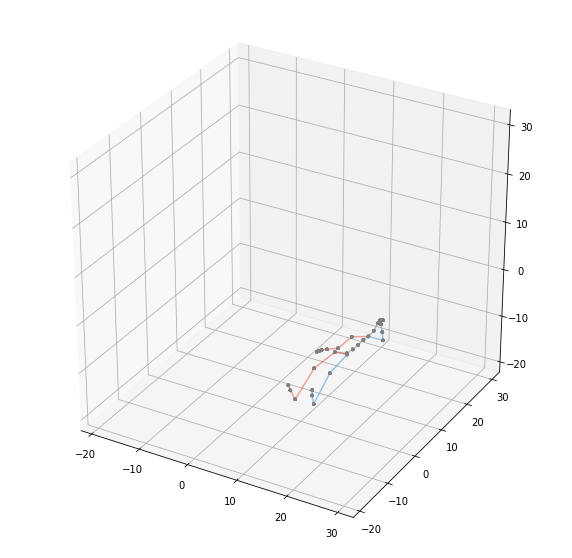

In [1]:
%matplotlib inline
import json; from pprint import pprint
Settings = json.load(open('settings.txt'))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sys
sys.path.insert(0,'../')
from pak.datasets.CMU_MoCap import CMU_MoCap, plot


data = CMU_MoCap(Settings['data_root'], 
                 z_is_up=False,
                 store_binary=False)

joints = data.get('01', '01')
human = joints[0]
minv = 1.1 * np.min(human)
maxv = 1.1 * np.max(human)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([minv, maxv])
ax.set_ylim([minv, maxv])
ax.set_zlim([minv, maxv])
plot(ax, human)
plt.show()

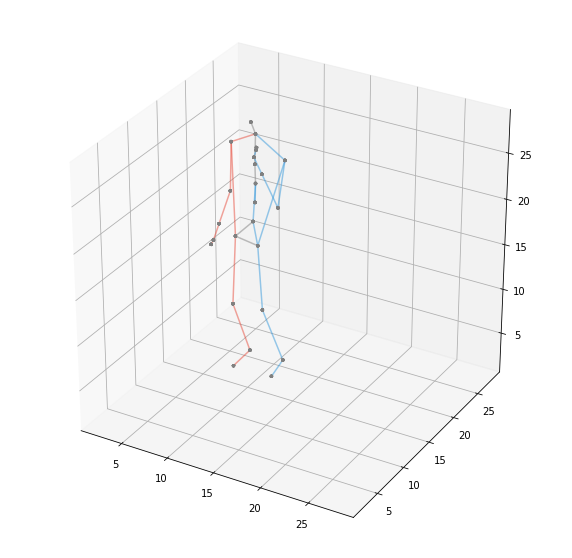

In [2]:
import pak.datasets.CMU_MoCap as cmu

joints, motions = data.get_asf_amc('01', '01')

V, joints = cmu.to_rotation_vector_representation(joints, motions)
v = V[0]




fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

pts3d = cmu.plot_vector(ax, v, joints, plot_jid=False)
minv = 1 * np.min(pts3d)
maxv = 1 * np.max(pts3d)

ax.set_xlim([minv, maxv])
ax.set_ylim([minv, maxv])
ax.set_zlim([minv, maxv])

plt.show()

In [3]:
for i, v in enumerate(sorted(cmu.JOINTS_TO_DOF.keys())):
    print(v, i)

head 0
lclavicle 1
lfemur 2
lfoot 3
lhand 4
lhipjoint 5
lhumerus 6
lowerback 7
lowerneck 8
lradius 9
ltibia 10
lwrist 11
rclavicle 12
rfemur 13
rfoot 14
rhand 15
rhipjoint 16
rhumerus 17
root 18
rradius 19
rtibia 20
rwrist 21
thorax 22
upperback 23
upperneck 24


In [4]:
# from pak.datasets.CMU_MoCap import JOINTS_TO_DOF, JOINT_AXIS_TO_INDEX

# def to_rotation_vector_representation(joints, motions):
#     rm_list=['fingers', 'toes', 'thumb']
#     joints, motions = remove_joints(joints, motions, rm_list)
#     n_frames = len(motions)
#     dim = 54
#     result = np.empty((n_frames, dim))
    
#     for t in range(n_frames):
#         result[t] = motion2vector(motions[t])
    
#     return result
    
# def motion2vector(motion):
#     result = np.empty((54,), np.float32)
#     for key in motion.keys():
#         if key not in JOINTS_TO_DOF:
#             continue
#         for deg, ax in zip(motion[key], JOINTS_TO_DOF[key]):
#             idx = JOINT_AXIS_TO_INDEX[key, ax]
#             result[idx] = np.deg2rad(deg)   
    
#     # handle root
#     root_pos = motion['root'][:3]
#     root_rot = motion['root'][3:]
#     for ax, v in zip(
#         ['x', 'y', 'z', 'rx', 'ry', 'rz'],
#         motion['root']):
#         if ax.startswith('r'):
#             v = np.deg2rad(v)
#         idx = JOINT_AXIS_TO_INDEX['root', ax]
#         result[idx] = v
        
    
#     return result

# def vector2motion(vector):
#     result = {}
#     for key, axs in JOINTS_TO_DOF.items():
#         v = []
#         for ax in axs:
#             idx = JOINT_AXIS_TO_INDEX[key, ax]
#             v.append(np.rad2deg(vector[idx]))
#         if len(v) > 0:
#             result[key] = v
    
#     v = []
#     for ax in ['x', 'y', 'z', 'rx', 'ry', 'rz']:
#         idx = JOINT_AXIS_TO_INDEX['root', ax]
#         value = vector[idx]
#         if ax.startswith('r'):
#             value = np.rad2deg(value)
#         v.append(value)
#     assert len(v) == 6
#     result['root'] = v
    
#     return result

# joints, motions = data.get_asf_amc('01', '01')
# #V = to_rotation_vector_representation(joints, motions)

# print(V.shape)

# m1 = motions[0]
# v = motion2vector(m1)
# m2 = vector2motion(v)


In [5]:
# for key in m2.keys():
#     print("~~")
#     print(m1[key])
#     print(m2[key])
#     print('--')